In [ ]:
!pip install kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Решить задачу регрессии для прогнозирования стоимости машин

Данные можно скачать двумя способами:

* Скачать данные с Kaggle, в Google Colab нажать слева значок папки и перетащить данные туда
* С помощью Kaggle API

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anvyss","key":"bb787a603c8c4d31896ff7fd855cadb7"}'}

In [ ]:
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download 'hellbuoy/car-price-prediction'

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 29.9MB/s]


In [ ]:
!unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [ ]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.shape)
data.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
data.drop('car_ID', axis = 1, inplace = True)

In [ ]:
data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#выделим категориальные признаки и числовые
#метод select_dtypes возвращает подмножество столбцов фрейма данных на основе dtypes столбцов
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

10


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [ ]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

15


['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
#посмотрим, какое количество уникальных значений имеют категориальные признаки и числовые
unic_categ = pd.DataFrame([[i,data[i].nunique()] for i in categorical_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])

In [ ]:
unic_categ

,column_name,num_unique
1,fueltype,2
2,aspiration,2
3,doornumber,2
6,enginelocation,2
5,drivewheel,3
4,carbody,5
7,enginetype,7
8,cylindernumber,7
9,fuelsystem,8
0,CarName,147


In [ ]:
data.CarName.head(10) #имя в виде производитель + модель

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [ ]:
data['company'] = [i.split()[0] for i in data.CarName.values]

In [ ]:
data.drop('CarName',axis=1,inplace=True)

In [ ]:
categorical_cols.append('company')
categorical_cols.remove('CarName')

In [ ]:
data.company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

In [ ]:
data["company"] = data["company"].replace(
    {
        "maxda": "mazda",
        "porcshce": "porsche",
        "Nissan": "nissan",
        "vokswagen": "volkswagen",
        "vw": "volkswagen",
        "toyouta": "toyota",
      }
)
data["company"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company, dtype: int64

In [ ]:
unic_numer = pd.DataFrame([[i,data[i].nunique()] for i in numeric_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])

In [ ]:
unic_numer

,column_name,num_unique
0,symboling,6
11,peakrpm,23
12,citympg,29
13,highwaympg,30
9,compressionratio,32
8,stroke,37
7,boreratio,38
3,carwidth,44
6,enginesize,44
4,carheight,49


In [ ]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
categorical_cols.append('symboling')
numeric_cols.remove('symboling')

In [ ]:
print(f'Кол-во категориальных признаков = {len(categorical_cols)}')
print(f'Кол-во числовых признаков = {len(numeric_cols)}')

Кол-во категориальных признаков = 11
Кол-во числовых признаков = 14


In [ ]:
target_name = 'price'
numeric_cols.remove('price')

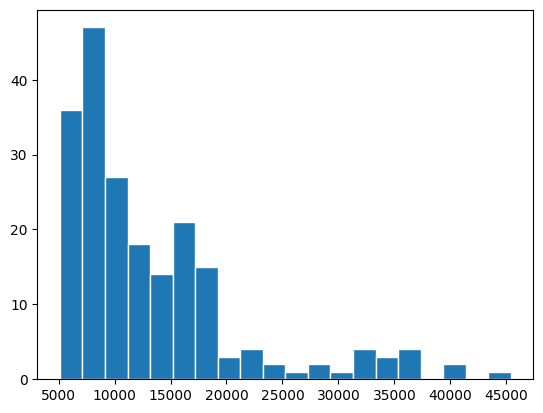

In [ ]:
#визуализация

plt.hist(data[target_name], bins = 20, edgecolor='white')
plt.show()


fig = px.box(data_frame=data, y=target_name, width=700)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(143, 24)
(143,)

(62, 24)
(62,)


In [ ]:
#сделаем одну выборку с нормализованными численными признаками
from sklearn.preprocessing import StandardScaler

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Категориальные переменные необходимо закодировать. Существует множество вариантов кодирования, среди которых наиболее распространенными являются:
1. [Порядковая кодировка](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html). Каждому новому значению признака присваивается новая метка. Обычно метки представляют собой числа от $0$ до $N –1$, где $N$ — количество уникальных значений признака. Поскольку принято обучать кодировщик на обучающей выборке, а тестовую выборку только изменять, может возникнуть ситуация, когда в тестовой выборке окажутся невстречающиеся ранее значения. Им присваивается новая переменная, например –1
2. [Кодирование One-hot ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one+hot#sklearn.preprocessing.OneHotEncoder). Для каждого значения признака задается колонка, в которую проставляются $1$, если этот признак характерен для объекта, и $0$ в противном случае. Если поменять местами $1$ и $0$, то данный метод превратится кодирование в One-cold. Не подходит для признаков, которые имеют много уникальных значений

In [ ]:
X_train[categorical_cols], X_train[categorical_cols].shape

(    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
 124      gas      turbo        two    hatchback        rwd          front   
 181      gas        std       four        wagon        rwd          front   
 154      gas        std       four        wagon        4wd          front   
 53       gas        std       four        sedan        fwd          front   
 94       gas        std        two        sedan        fwd          front   
 ..       ...        ...        ...          ...        ...            ...   
 133      gas        std       four        sedan        fwd          front   
 137      gas      turbo       four        sedan        fwd          front   
 72       gas        std        two  convertible        rwd          front   
 140      gas        std        two    hatchback        4wd          front   
 37       gas        std        two    hatchback        fwd          front   
 
     enginetype cylindernumber fuelsystem   company  symboling

In [ ]:
# Кодирование категориальных признаков
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = encoder.fit_transform(X_train[categorical_cols]).astype(int)
X_test_cat = encoder.fit_transform(X_test[categorical_cols]).astype(int)

In [ ]:
X_train_cat.shape, X_train_cat

((143, 11),
 array([[ 1,  1,  1, ...,  5, 14,  5],
        [ 1,  0,  0, ...,  4, 19,  1],
        [ 1,  0,  0, ...,  1, 19,  2],
        ...,
        [ 1,  0,  1, ...,  4,  3,  5],
        [ 1,  0,  1, ...,  1, 18,  4],
        [ 1,  0,  1, ...,  0,  6,  2]]))

In [ ]:
#объеденим в один набор численные и категориальные признаки
X_train_new = np.hstack((X_train_num_scaled, X_train_cat))
X_test_new = np.hstack((X_test_num_scaled, X_test_cat))
X_train_new.shape, X_test_new.shape

((143, 24), (62, 24))

In [ ]:
np.random.seed(1)
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
pred_lr = model_lr.predict(X_test_new) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
print("Средняя ошибка прогноза цены автомобиля:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены автомобиля: 2193.5034110413535
MSE = 10313394.739; R2 = 0.8292


In [ ]:
model_lr.intercept_

14862.736397409326

In [ ]:
np.random.seed(1)
model_lasso = Lasso()

In [ ]:
model_lasso.fit(X_train_new, y_train)

Lasso()

In [ ]:
pred_lr_lasso = model_lasso.predict(X_test_new) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr_lasso)
r2 = r2_score(y_test, pred_lr_lasso)
mae = mean_absolute_error(y_test, pred_lr_lasso)
print("Средняя ошибка прогноза цены автомобиля:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены автомобиля: 2192.876654880914
MSE = 10280191.421; R2 = 0.8297


In [ ]:
np.random.seed(1)
model_ridge = Ridge()

In [ ]:
model_ridge.fit(X_train_new, y_train)

Ridge()

In [ ]:
pred_lr_ridge = model_ridge.predict(X_test_new) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr_ridge)
r2 = r2_score(y_test, pred_lr_ridge)
mae = mean_absolute_error(y_test, pred_lr_ridge)
print("Средняя ошибка прогноза цены автомобиля:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены автомобиля: 2234.9499591365325
MSE = 10313871.765; R2 = 0.8292


[]

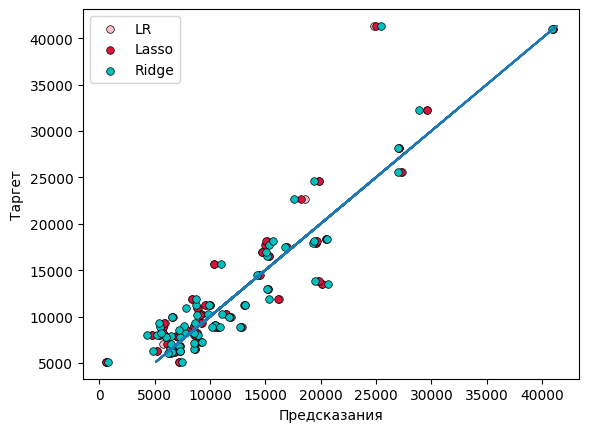

In [ ]:
plt.plot(y_test,y_test)
plt.scatter(pred_lr,y_test, color = 'pink', label = 'LR',s=30,edgecolor='black', linewidths=0.5)
plt.scatter(pred_lr_lasso,y_test, color = 'crimson', label = 'Lasso',s=30,edgecolor='black', linewidths=0.5)
plt.scatter(pred_lr_ridge,y_test, color = 'c', label = 'Ridge',s=30,edgecolor='black', linewidths=0.5)
plt.xlabel('Предсказания')
plt.ylabel('Таргет')
plt.legend()
plt.plot()